# Importacion de librerias


In [521]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model,preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit

# Importación del dataset

In [522]:
df =pd.read_csv('fetal_health.csv',sep=",")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# Descripción del dataset

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [524]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Clases a predecir

In [525]:
health = df.groupby("fetal_health", as_index=False)['baseline value'].count()
health.head(10)

,fetal_health,baseline value
0,1.0,1655
1,2.0,295
2,3.0,176


C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


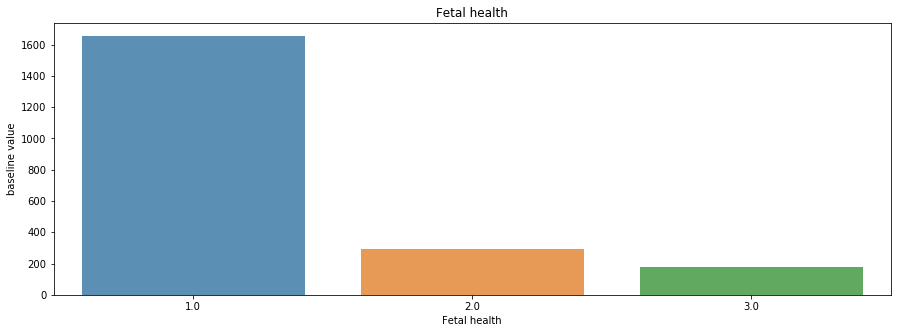

In [526]:
plt.figure(figsize=(15,5))
sns.barplot(health['fetal_health'].values, health['baseline value'].values, alpha=0.8)
plt.title('Fetal health')
plt.ylabel('baseline value', fontsize=10)
plt.xlabel('Fetal health', fontsize=10)
plt.show()

# Division de prueba y entrenamiento


In [527]:
x=df[["baseline value","accelerations","fetal_movement","uterine_contractions","light_decelerations","severe_decelerations","prolongued_decelerations","abnormal_short_term_variability","mean_value_of_short_term_variability","percentage_of_time_with_abnormal_long_term_variability"]]
x

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0
...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0


In [528]:
scaler=preprocessing.MinMaxScaler()
x=scaler.fit_transform(x)

In [529]:
x

array([[0.25925926, 0.        , 0.        , ..., 0.81333333, 0.04411765,
        0.47252747],
       [0.48148148, 0.31578947, 0.        , ..., 0.06666667, 0.27941176,
        0.        ],
       [0.5       , 0.15789474, 0.        , ..., 0.05333333, 0.27941176,
        0.        ],
       ...,
       [0.62962963, 0.05263158, 0.        , ..., 0.89333333, 0.02941176,
        0.21978022],
       [0.62962963, 0.05263158, 0.        , ..., 0.88      , 0.02941176,
        0.2967033 ],
       [0.66666667, 0.10526316, 0.004158  , ..., 0.82666667, 0.02941176,
        0.3956044 ]])

In [530]:
y=df["fetal_health"].values
y

array([2., 1., 1., ..., 2., 2., 1.])

In [531]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, train_size=0.7)

In [532]:
len(x_train),len(x_test),len(y_train),len(y_test)

(1488, 638, 1488, 638)

In [533]:
print('**Sample test:', sorted(Counter(y_test).items()))

**Sample test: [(1.0, 496), (2.0, 101), (3.0, 41)]


In [534]:
print('**Sample train:', sorted(Counter(y_train).items()))

**Sample train: [(1.0, 1159), (2.0, 194), (3.0, 135)]


# Balanceando las instancias

In [541]:
ros_train = RandomOverSampler(random_state=1000)
x_train, y_train = ros_train.fit_resample(x_train, y_train)

ros_test = RandomOverSampler(random_state=1000)
x_test, y_test = ros_test.fit_resample(x_test, y_test)

# Entrenamiento de modelo

In [542]:
regs=linear_model.LogisticRegression(multi_class="multinomial",solver="lbfgs",C=1,max_iter=10000)

In [543]:
regs.fit(x_train,y_train)

LogisticRegression(C=1, max_iter=10000, multi_class='multinomial')

In [544]:
y_prob=regs.predict(x_test)

In [546]:
classification = classification_report(y_test, y_prob)
print(classification)

              precision    recall  f1-score   support

         1.0       0.91      0.80      0.85       496
         2.0       0.76      0.82      0.79       496
         3.0       0.86      0.89      0.88       496

    accuracy                           0.84      1488
   macro avg       0.84      0.84      0.84      1488
weighted avg       0.84      0.84      0.84      1488



In [548]:
confusion_matrix(y_test,y_prob)

array([[398,  74,  24],
       [ 40, 409,  47],
       [  0,  54, 442]], dtype=int64)

In [549]:
print('Accuracy : ', accuracy_score(y_prob,y_test))
print('Recall_score : ', recall_score(y_prob,y_test,average="macro"))
print('Precision_score : ', precision_score(y_prob,y_test,average="weighted"))
print('Puntuación F1 : ', f1_score(y_prob,y_test,average="micro"))

Accuracy :  0.8393817204301075
Recall_score :  0.84397099111278
Precision_score :  0.8410062760145681
Puntuación F1 :  0.8393817204301075
